In [1]:
pip install torch torchvision torchaudio


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# ------------------------
# 1. Load pretrained ResNet50 (without classifier layer)
# ------------------------
resnet = models.resnet50(pretrained=True)
feature_extractor = torch.nn.Sequential(*(list(resnet.children())[:-1]))
feature_extractor.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ------------------------
# 2. Function to extract features from one image
# ------------------------
def extract_features(img_path):
    img = Image.open(img_path).convert("RGB")
    x = transform(img).unsqueeze(0)  # add batch dimension
    with torch.no_grad():
        features = feature_extractor(x).flatten().numpy()
    return features

# ------------------------
# 3. Loop through dataset
# ------------------------
data_dir = r"C:\Users\RUTH\Desktop\Object Classification Project"  # e.g., dataset/class1/, dataset/class2/
X, y = [], []

for label, class_name in enumerate(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    for file in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, file)
        try:
            feats = extract_features(img_path)
            X.append(feats)
            y.append(label)
        except:
            print(f"Skipping {img_path}")

X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

# ------------------------
# 4. Train/Test Split + Random Forest
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ------------------------
# 5. Evaluate
# ------------------------
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\RUTH\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RUTH\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Processing Veda_Crayons: 100%|███████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.08it/s]


Feature matrix shape: (92, 2048)
Labels shape: (92,)
Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       0.00      0.00      0.00         2
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1

    accuracy                           0.74        19
   macro avg       0.59      0.69      0.62        19
weighted avg       0.67      0.74      0.68        1

C:\Users\RUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUTH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUTH\anaconda3\Lib\site-packages\sklearn\m

In [27]:
# Extract features for new image
new_features = extract_features(r"C:\Users\RUTH\Desktop\Object Classification Project\camel_set\IMG_20250822_111330.jpg").reshape(1, -1)

# Predict class index
pred_idx = clf.predict(new_features)[0]

# Map index → class name
print("Predicted label:", class_names[pred_idx])


Predicted label: Classmate_Set


In [19]:
class_names = sorted(os.listdir(data_dir))  # class names from folder names

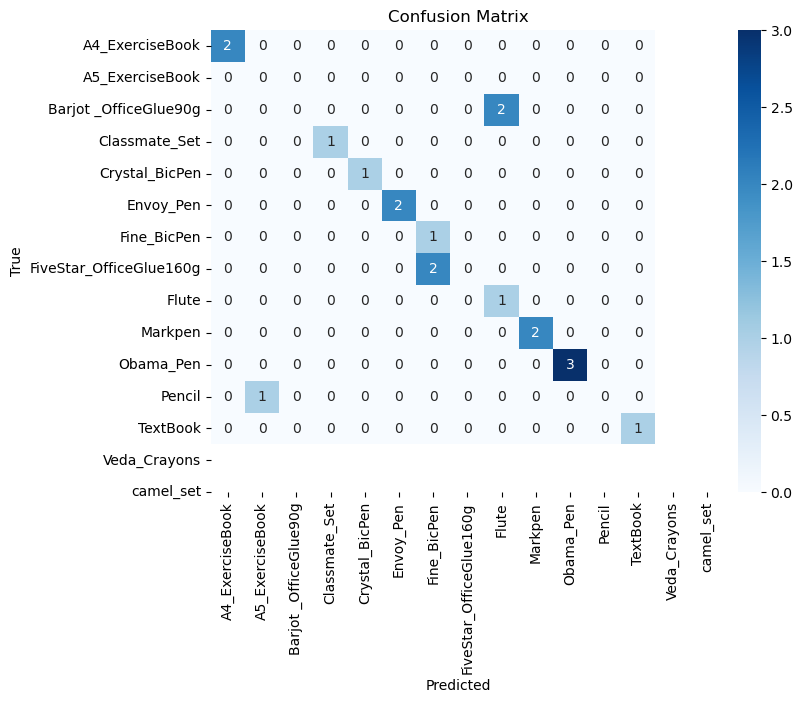

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
